# Introduction | Give me some credits

Current dataset has been acquired from Kaggle competition.   
The main goal is to build a model that can accurately classify individuals based on their ability to repay a loan or default.  
Source:
https://www.kaggle.com/competitions/GiveMeSomeCredit/overview

## Importing libraries, funcs & data 
 


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import abc
import warnings
from typing import Callable, Optional
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from typing import Type, Dict, Any
from dataclasses import dataclass
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from typing import Type, Dict, Any
from dataclasses import dataclass
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import abc

warnings.filterwarnings('ignore')

In [10]:

test_df, training_df = pd.read_csv('data/cs-test.csv'), pd.read_csv(
    'data/cs-training.csv')

## Data exploration


### training data exploration 

In [11]:
training_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [12]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [13]:
training_df.describe().round(decimals=2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


In [14]:
training_df.isna().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [15]:
training_df.duplicated().sum()

0

In [16]:
training_df.nunique().sort_values()

SeriousDlqin2yrs                             2
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
NumberOfTime30-59DaysPastDueNotWorse        16
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfOpenCreditLinesAndLoans             58
age                                         86
MonthlyIncome                            13594
DebtRatio                               114194
RevolvingUtilizationOfUnsecuredLines    125728
Unnamed: 0                              150000
dtype: int64

In [17]:
training_df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object



### test data exploration

In [18]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [20]:
test_df.describe().round(decimals=2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.00,0.0,101503.00,101503.00,101503.00,101503.00,81400.00,101503.00,101503.00,101503.00,101503.00,98877.00
mean,50752.00,NaN,5.31,52.41,0.45,344.48,6855.04,8.45,0.30,1.01,0.27,0.77
std,29301.54,NaN,196.16,14.78,4.54,1632.60,36508.60,5.14,4.52,1.11,4.50,1.14
min,1.00,NaN,0.00,21.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,25376.50,NaN,0.03,41.00,0.00,0.17,3408.00,5.00,0.00,0.00,0.00,0.00
50%,50752.00,NaN,0.15,52.00,0.00,0.36,5400.00,8.00,0.00,1.00,0.00,0.00
75%,76127.50,NaN,0.56,63.00,0.00,0.85,8200.00,11.00,0.00,2.00,0.00,1.00
max,101503.00,NaN,21821.00,104.00,98.00,268326.00,7727000.00,85.00,98.00,37.00,98.00,43.00


In [21]:
test_df.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [22]:
test_df.duplicated().sum()

0




## Data adjustments (Data Preprocessing)

In [23]:
training_df.loc[training_df['age']==0,'age'] = training_df['age'].median()

In [24]:
test_df.nunique().sort_values()

SeriousDlqin2yrs                             0
NumberOfTime60-89DaysPastDueNotWorse        12
NumberOfDependents                          13
NumberOfTime30-59DaysPastDueNotWorse        16
NumberOfTimes90DaysLate                     18
NumberRealEstateLoansOrLines                24
NumberOfOpenCreditLinesAndLoans             56
age                                         82
MonthlyIncome                            11976
DebtRatio                                79878
RevolvingUtilizationOfUnsecuredLines     85716
Unnamed: 0                              101503
dtype: int64

In [25]:
test_df.dtypes

Unnamed: 0                                int64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [26]:
median_values = {
    'MonthlyIncome': training_df['MonthlyIncome'].median(),
    'NumberOfDependents': training_df['NumberOfDependents'].median()
}

training_df.fillna(value=median_values, inplace=True)


In [27]:
training_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)

## Exploratory Data Analysis (EDA)

In [29]:
def create_matrix_correlation(data):
    corr = data.corr()
    fig = plt.figure(figsize=(10,10))    
    sns.heatmap(corr, annot=True, fmt='.2f', cmap = "coolwarm",cbar=True)         
    fig.tight_layout()
    plt.show()

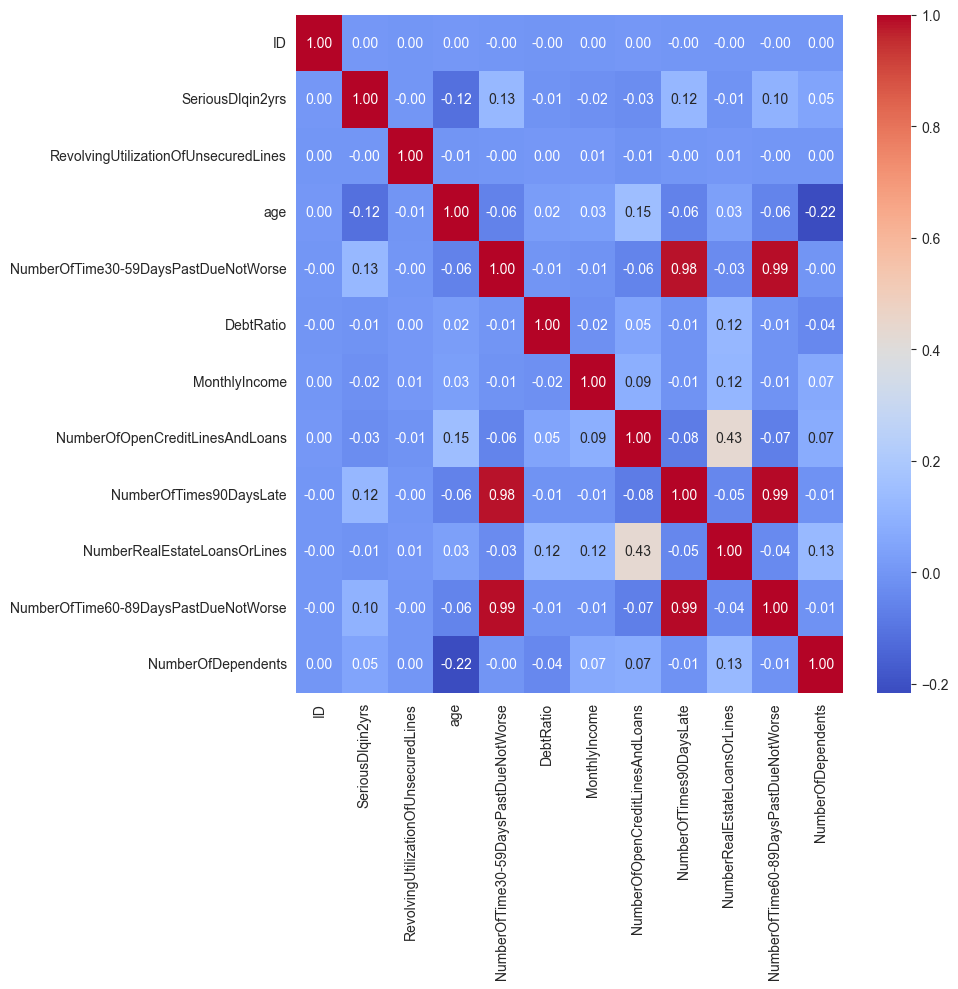

In [30]:
create_matrix_correlation(training_df)

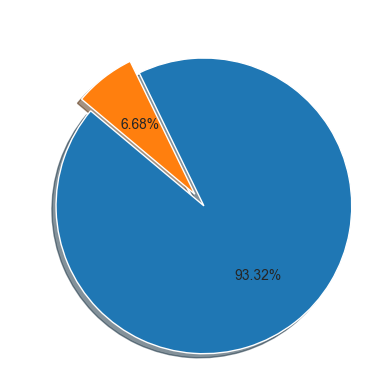

In [31]:
sizes = [25, 35]  
explode = (0.1, 0) 
plt.pie(x = training_df['SeriousDlqin2yrs'].value_counts(),
        explode=explode,
        autopct='%1.2f%%', 
        shadow=True, 
        startangle=140)

plt.show()

In [32]:
training_df['age'].value_counts().sort_index()

age
21     183
22     434
23     641
24     816
25     953
      ... 
102      3
103      3
105      1
107      1
109      2
Name: count, Length: 85, dtype: int64

In [33]:
training_df.loc[training_df['age']==0]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents


In [34]:
training_df.columns

Index(['ID', 'SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [35]:
training_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index()

NumberOfTime30-59DaysPastDueNotWorse
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: count, dtype: int64

In [36]:
training_df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index()

NumberOfTime60-89DaysPastDueNotWorse
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: count, dtype: int64

In [37]:
training_df['NumberOfTimes90DaysLate'].value_counts().sort_index()

NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: count, dtype: int64

In [38]:
training_df[training_df['NumberOfTimes90DaysLate']==96]

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
41944,41945,1,1.0,26,96,0.000000,5400.0,0,96,0,96,0.0
69478,69479,1,1.0,33,96,0.008047,4100.0,0,96,0,96,0.0
84167,84168,1,1.0,29,96,0.000000,2800.0,0,96,0,96,2.0
94106,94107,1,1.0,34,96,0.000000,3500.0,0,96,0,96,1.0
120049,120050,0,1.0,46,96,0.051765,4616.0,0,96,0,96,0.0


## Splitting Data into Train and Validation sets & Scalarization

In [39]:
X = training_df.drop('SeriousDlqin2yrs', axis=1)
y = training_df['SeriousDlqin2yrs']

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, 
                                                  y, 
                                                  test_size=0.2, 
                                                  train_size = 0.8)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

## Model building & training

In [42]:
@dataclass
class ModelBuildingHelper:
    model_class: Type[abc.ABCMeta]
    X_train: pd.DataFrame
    X_val: pd.DataFrame
    y_train: pd.Series
    y_val: pd.Series
    test_data: pd.DataFrame
    params_grid: Dict[str, Any]  = None

    def __post_init__(self):
        self.model_instance = self.model_class
        if self.params_grid:
            self.grid_search = GridSearchCV(
                estimator = self.model_instance,
                param_grid =  self.params_grid,
                cv = 5
            )
        else:
            self.grid_search = None

    def train_model(self):
        if self.grid_search:
            self.grid_search.fit(self.X_train, self.y_train)
            self.model_instance = self.grid_search.best_estimator_
        else:
            self.model_instance.fit(self.X_train, self.y_train)

        # self.grid_search.fit(self.X_train, self.y_train)
        # if self.params_grid:
        #     self.model_instance = self.grid_search.best_estimator_
        
    def evaluate_model(self):
        y_val_pred = self.model_instance.predict(self.X_val)
        accuracy = accuracy_score(self.y_val, y_val_pred)
        precision = precision_score(self.y_val, y_val_pred)
        recall = recall_score(self.y_val, y_val_pred)
        f1 = f1_score(self.y_val, y_val_pred)
        
        y_pred_proba = self.model_instance.predict_proba(self.X_val)[::,1]
        fpr, tpr, _ = roc_curve (self.y_val, y_pred_proba)
        auc = roc_auc_score(self.y_val, y_pred_proba)
        cm = confusion_matrix(self.y_val, y_val_pred)
        
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        plt.figure(figsize=(6, 6)) 
        disp.plot(cmap='Blues', colorbar=False) 
        
        plt.title('Confusion Matrix')
        plt.figure(figsize=(6, 6))  
        plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        
        plt.show()
        
        print(f'Accuracy: {accuracy:.4f}\n'
              f'Precision: {precision:.4f}\n'
              f'Recall: {recall:.4f}\n'
              f'f1: {f1:.4f}\n',
              )
    
    def predict(self):
        return self.model_instance.predict(self.test_data)
    def get_best_params(self):
        if self.grid_search:
            return self.grid_search.best_params_
        else:
            raise ValueError("GridSearchCV hasn't been completed yet")

In [67]:
model = LogisticRegression(n_jobs=-1)
logistic_classifier = ModelBuildingHelper(
    model_class = model, 
    X_train = X_train_scaled,
    X_val = X_val_scaled,
    y_train = y_train,
    y_val = y_val,
    test_data = test_df,
    params_grid = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100,140,210],
    }
)

In [68]:
logistic_classifier.train_model()

In [41]:
model = XGBClassifier(n_jobs=-1)
xgb_classifier = ModelBuildingHelper(
    model_class = model, 
    X_train = X_train_scaled,
    X_val = X_val_scaled,
    y_train = y_train,
    y_val = y_val,
    test_data = test_df,
    params_grid = {
        'n_estimators': [170, 230,300],
        'learning_rate': [0.1],
        'booster': ['gbtree', 'gblinear'],
        'gamma': [0,0.5,1],
        'max_depth': [5,10]
    }
)

In [42]:
xgb_classifier.train_model()

For some reason it takes a while for the model below to train.
Therefore, I am not considering gradient_boosting_classifier for now. 

In [ ]:
model = GradientBoostingClassifier()
gradient_boosting_classifier = ModelBuildingHelper(
    model_class = model, 
    X_train = X_train_scaled,
    X_val = X_val_scaled,
    y_train = y_train,
    y_val = y_val,
    test_data = test_df,
    params_grid = {
        'n_estimators': [150,200],
        'learning_rate': [0.05,0.1],
        'max_depth': [3,5],
    }
)

In [ ]:
gradient_boosting_classifier.train_model()

In [43]:
model = DecisionTreeClassifier()
decision_tree_classifier = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_val_scaled,
    y_train=y_train,
    y_val=y_val,
    test_data=test_df,
    params_grid={
        'max_depth': [10, 20, 30],
        'min_samples_split': [2,5,10],
        'min_samples_leaf': [1, 4]
    }
)


In [44]:
decision_tree_classifier.train_model()

In [45]:
model = RandomForestClassifier()
random_forest_classifier = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_val_scaled,
    y_train=y_train,
    y_val=y_val,
    test_data=test_df,
    params_grid={
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2],
    }
)

In [46]:
random_forest_classifier.train_model()

In [47]:
model = AdaBoostClassifier()
params_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
}

ada_classifier = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_val_scaled,
    y_train=y_train,
    y_val=y_val,
    test_data=test_df,
    params_grid=params_grid_adaboost
)

In [48]:
ada_classifier.train_model()

In [61]:
model = CatBoostClassifier(verbose=False)

params_grid_catboost = {
    'iterations': [100, 200],
    'learning_rate': [0.1, 0.2],
    'depth': [8, 10],
    'l2_leaf_reg': [1, 3],
    'loss_function': ['Logloss', 'CrossEntropy']
}
cat_boost_classifier = ModelBuildingHelper(
    model_class=model,
    X_train=X_train_scaled,
    X_val=X_val_scaled,
    y_train=y_train,
    y_val=y_val,
    test_data=test_df,
    params_grid=params_grid_catboost
)

In [62]:
cat_boost_classifier.train_model()

0:	learn: 0.6176486	total: 27.9ms	remaining: 2.76s
1:	learn: 0.5560429	total: 47.8ms	remaining: 2.34s
2:	learn: 0.5052096	total: 65.8ms	remaining: 2.13s
3:	learn: 0.4621591	total: 82.5ms	remaining: 1.98s
4:	learn: 0.4254858	total: 98ms	remaining: 1.86s
5:	learn: 0.3941392	total: 109ms	remaining: 1.7s
6:	learn: 0.3669263	total: 125ms	remaining: 1.66s
7:	learn: 0.3437262	total: 147ms	remaining: 1.69s
8:	learn: 0.3234379	total: 174ms	remaining: 1.76s
9:	learn: 0.3058630	total: 192ms	remaining: 1.73s
10:	learn: 0.2902824	total: 209ms	remaining: 1.69s
11:	learn: 0.2769082	total: 232ms	remaining: 1.7s
12:	learn: 0.2648753	total: 250ms	remaining: 1.67s
13:	learn: 0.2547560	total: 272ms	remaining: 1.67s
14:	learn: 0.2459267	total: 299ms	remaining: 1.69s
15:	learn: 0.2378116	total: 319ms	remaining: 1.67s
16:	learn: 0.2306875	total: 336ms	remaining: 1.64s
17:	learn: 0.2245111	total: 354ms	remaining: 1.61s
18:	learn: 0.2190340	total: 370ms	remaining: 1.58s
19:	learn: 0.2141237	total: 387ms	remain

## Model comparison

<Figure size 600x600 with 0 Axes>

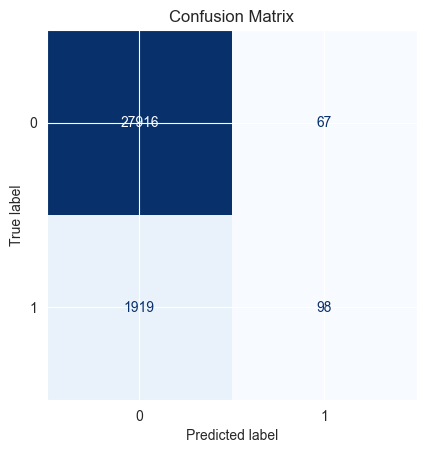

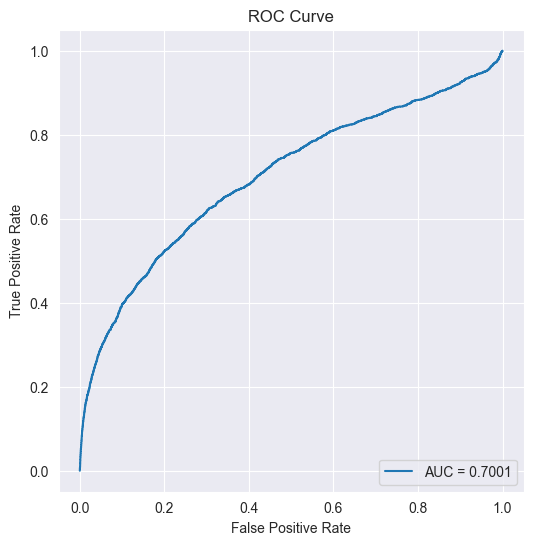

Accuracy: 0.9338
Precision: 0.5939
Recall: 0.0486
f1: 0.0898



In [69]:
logistic_classifier.evaluate_model()

<Figure size 600x600 with 0 Axes>

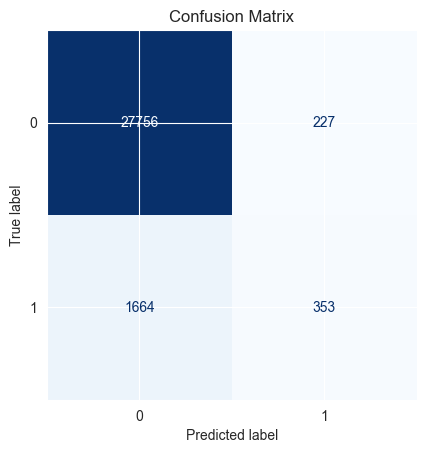

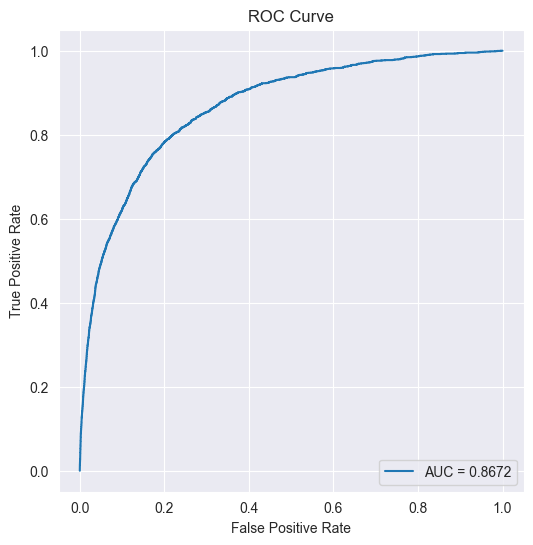

Accuracy: 0.9370
Precision: 0.6086
Recall: 0.1750
f1: 0.2719



In [52]:
xgb_classifier.evaluate_model()

<Figure size 600x600 with 0 Axes>

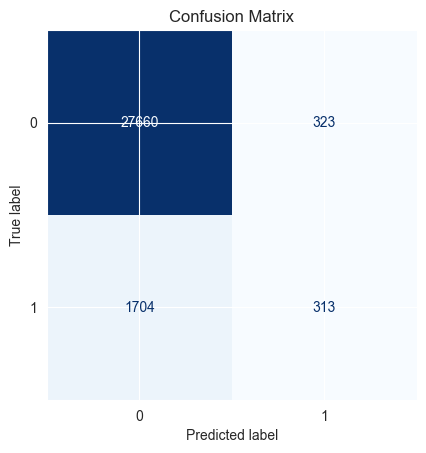

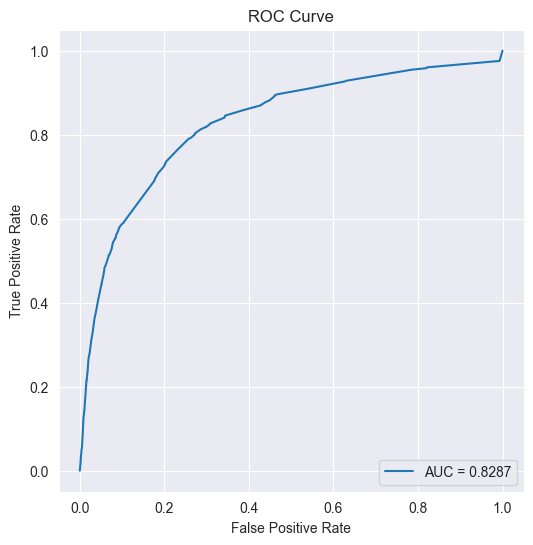

Accuracy: 0.9324
Precision: 0.4921
Recall: 0.1552
f1: 0.2360



In [56]:
decision_tree_classifier.evaluate_model()

<Figure size 600x600 with 0 Axes>

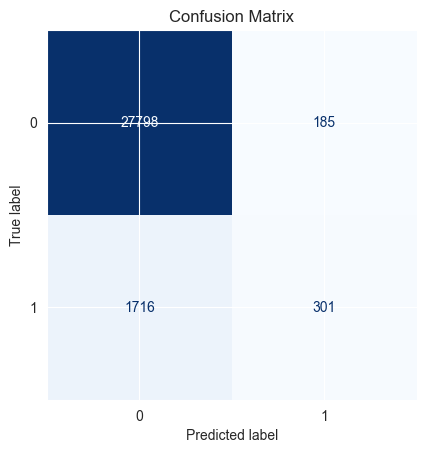

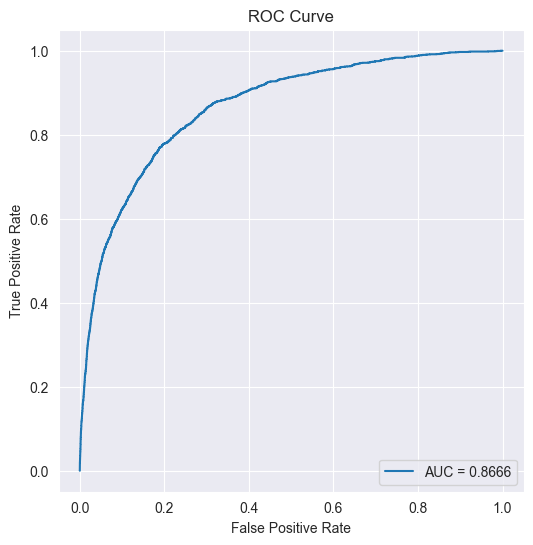

Accuracy: 0.9366
Precision: 0.6193
Recall: 0.1492
f1: 0.2405



In [57]:
random_forest_classifier.evaluate_model()

<Figure size 600x600 with 0 Axes>

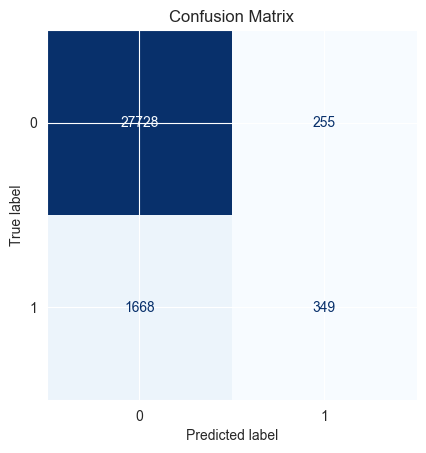

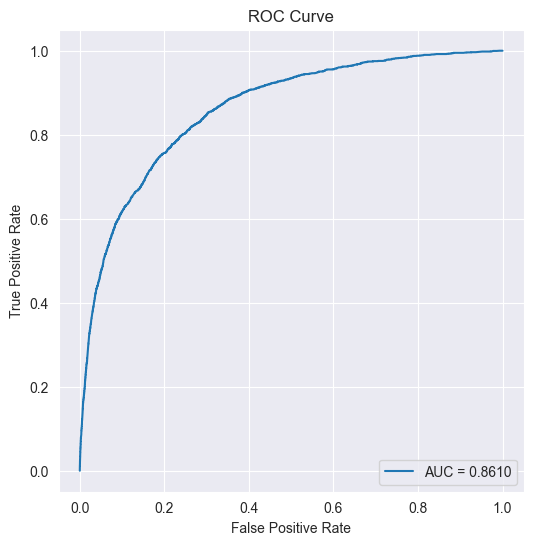

Accuracy: 0.9359
Precision: 0.5778
Recall: 0.1730
f1: 0.2663



In [58]:
ada_classifier.evaluate_model()

<Figure size 600x600 with 0 Axes>

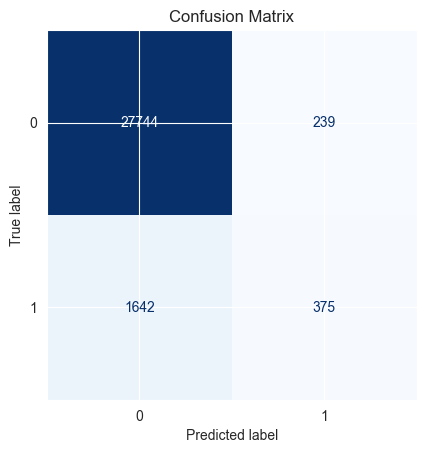

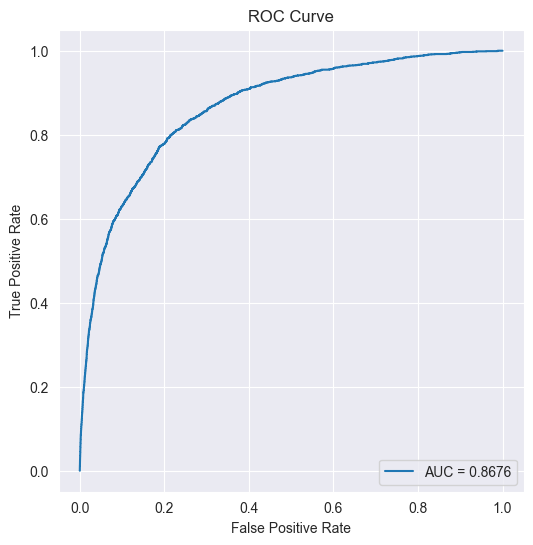

Accuracy: 0.9373
Precision: 0.6107
Recall: 0.1859
f1: 0.2851



In [63]:
cat_boost_classifier.evaluate_model()

## Tuning the best model & model validation

In [43]:
cat_boost_classifier.get_best_params()

NameError: name 'cat_boost_classifier' is not defined

In [44]:
model = CatBoostClassifier(
    depth=8,
    iterations=100,
    l2_leaf_reg=1,
    learning_rate=0.1,
    loss_function='Logloss',
    verbose=False
)

In [45]:
best_model = ModelBuildingHelper(
    model_class=model,
    X_train=X_train,
    X_val=X_val,
    y_train=y_train,
    y_val=y_val,
    test_data=test_df,
)

In [46]:
best_model.train_model()

In [47]:
trained_best_model = best_model.model_instance

In [51]:
y_test_pred = trained_best_model.predict_proba(test_df.drop('SeriousDlqin2yrs', axis=1))[:,1]

In [56]:
submission_df = pd.DataFrame({'ID': test_df['ID'],
                              'Probability': y_test_pred})
submission_df.to_csv('submission.csv', index=False)



## Conclusions

Having evaluated several classification models such as Logistic Regression, Boosting models, Decision Tree Classifier etc.,
I've made a decision to stick with CatBoost Classifier. Here's why:
The CatBoost model has achieved quite better performance apart from the other models by considering metrics:
Accuracy: 0.9371
Precision: 0.6086
Recall: 0.1820
F1 Score: 0.2802
As for the result, I suppose it's quite comprehensive: in the Kaggle's competition it's reached score approximated to 0.87.
Still, the relatively low recall indicates potential areas for improvement, which might involve further tuning of hyperparameters
